In [2]:
import pandas as pd
import numpy as np
import ccxt
import pandas_ta as ta
# import plotly as plt
# from matplotlib import pyplot as plt
import plotly.graph_objects as go
# import vectorbt as vb
from datetime import datetime
import time
import math
from binance.client import Client

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
pd.options.mode.chained_assignment = None 

In [3]:
api = ""
private = ""

In [14]:
exchange = ccxt.binance({
    "api_key":api,
    "secret": private,
    "enableRateLimit":True,
})
all_symbol = list(exchange.load_markets())
target_symbol = []
for i in range(len(all_symbol)):
    pair = all_symbol[i].split("/")
    if (pair[1] == "USDT" and pair[0] != 'VET' and pair[0] != "BSV" and pair[0] != "BCC" and pair[0] != "EUR"):
        target_symbol.append(pair[0])
print(target_symbol)

['BTC', 'ETH', 'BNB', 'NEO', 'LTC', 'QTUM', 'ADA', 'XRP', 'EOS', 'TUSD', 'IOTA', 'XLM', 'ONT', 'TRX', 'ETC', 'ICX', 'VEN', 'NULS', 'PAX', 'BCH', 'USDC', 'LINK', 'WAVES', 'BTT', 'USDS', 'ONG', 'HOT', 'ZIL', 'ZRX', 'FET', 'BAT', 'XMR', 'ZEC', 'IOST', 'CELR', 'DASH', 'NANO', 'OMG', 'THETA', 'ENJ', 'MITH', 'MATIC', 'ATOM', 'TFUEL', 'ONE', 'FTM', 'ALGO', 'USDSB', 'GTO', 'ERD', 'DOGE', 'DUSK', 'ANKR', 'WIN', 'COS', 'NPXS', 'COCOS', 'MTL', 'TOMO', 'PERL', 'DENT', 'MFT', 'KEY', 'STORM', 'DOCK', 'WAN', 'FUN', 'CVC', 'CHZ', 'BAND', 'BUSD', 'BEAM', 'XTZ', 'REN', 'RVN', 'HC', 'HBAR', 'NKN', 'STX', 'KAVA', 'ARPA', 'IOTX', 'RLC', 'MCO', 'CTXC', 'TROY', 'VITE', 'FTT', 'OGN', 'DREP', 'BULL', 'BEAR', 'ETHBULL', 'ETHBEAR', 'TCT', 'WRX', 'BTS', 'LSK', 'BNT', 'LTO', 'EOSBULL', 'EOSBEAR', 'XRPBULL', 'XRPBEAR', 'STRAT', 'AION', 'MBL', 'COTI', 'BNBBULL', 'BNBBEAR', 'STPT', 'WTC', 'DATA', 'XZC', 'SOL', 'CTSI', 'HIVE', 'CHR', 'BTCUP', 'BTCDOWN', 'GXS', 'ARDR', 'LEND', 'MDT', 'STMX', 'KNC', 'REP', 'LRC', 'PNT',

In [5]:
symbol = "BTC/USDT"
timeframe = "1d"
candles = exchange.fetch_ohlcv(symbol,timeframe = timeframe, limit = None)
candles
df = pd.DataFrame(candles[:], columns = ["timestamp", "open", "high", "low", "close", "volume"])
df["date"] = pd.to_datetime(df["timestamp"], unit="ms").astype(str)
df = df.drop(["timestamp"], axis=1)


In [6]:
smooth = 2
short_period = 10
df["short EMA"] = df["close"].copy()
for i in range(1, len(df)):
    df["short EMA"][i] = df["short EMA"][i - 1] * (1 - smooth / (short_period + 1)) + df["short EMA"][i] * smooth / (short_period + 1)

df["short DEMA"] = 2 * df["short EMA"].copy()
short_DEMA = df["short EMA"]
for i in range(1, len(df)):
    short_DEMA[i] = df["short EMA"][i - 1] * (1 - smooth / (short_period + 1)) + df["short EMA"][i] * smooth / (short_period + 1)
df["short DEMA"] -= short_DEMA

<AxesSubplot:>

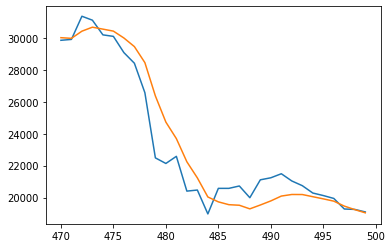

In [7]:
df["close"][-30:].plot()
df["short DEMA"][-30:].plot()

In [16]:
profits = []
count = 0
# target_symbol = ["BTC", "ETH", "SOL", "AVAX", "ADA", "BNB", "FTT"]
# target_symbol = ["BTC", "ETH", "ADA", "BNB"]
# target_symbol = ["BTC", "ETH"]
# target_symbol = ["COCOS"]
for coin in target_symbol:
    client = Client("YjY0w2BJZZ35o2Q9So1OvRP1gm3exc01LKp2yyLpMth5xmqVn0tQosRYOPrnb7la", "5rRXJ2rOa96hVPZTTOfVP9H4blP6AMt2QN2M0RWX2cMq9PngbJ5MEK88eGB9I4YD")
    start_str="2 year ago UTC"
    bars = client.get_historical_klines(symbol=f'{coin}USDT',interval=client.KLINE_INTERVAL_12HOUR,start_str=start_str)
    test_df = pd.DataFrame(bars[:],columns=["timestamp","open","high","low","close","volume", "close_time", "quote_asset_volume", "number_of_trade", "TBB", "TBQ", "ignore"])
    test_df["date"]=pd.to_datetime(test_df["timestamp"],unit="ms").astype(str)
    test_df = test_df.drop(["timestamp", "close_time", "quote_asset_volume", "number_of_trade", "TBB", "TBQ", "ignore"], axis=1)
    test_df["open"] = pd.to_numeric(test_df["open"])
    test_df["high"] = pd.to_numeric(test_df["high"])
    test_df["low"] = pd.to_numeric(test_df["low"])
    test_df["close"] = pd.to_numeric(test_df["close"])
    test_df["volume"] = pd.to_numeric(test_df["volume"])

    smooth = 2
    short_period = 10
    long_period = 100
    if (len(test_df) < long_period):
        count += 1
        continue

    test_df["short EMA"] = test_df["close"].copy()
    for i in range(1, len(test_df)):
        test_df["short EMA"][i] = test_df["short EMA"][i - 1] * (1 - smooth / (short_period + 1)) + test_df["short EMA"][i] * smooth / (short_period + 1)
        # test_df["short EMA"][i] = test_df["short EMA"][i - 1] * (1 - smooth / (short_period + 1)) + test_df["close"][i] * smooth / (short_period + 1)

    # test_df["short DEMA"] = 2 * test_df["short EMA"].copy()
    test_df["short DEMA"] = test_df["short EMA"].copy()
    # short_DEMA = test_df["short EMA"]
    # for i in range(1, len(test_df)):
        # short_DEMA[i] = test_df["short EMA"][i - 1] * (1 - smooth / (short_period + 1)) + test_df["short EMA"][i] * smooth / (short_period + 1)
        # short_DEMA[i] = test_df["short EMA"][i - 1] * (1 - smooth / (short_period + 1)) + test_df["close"][i] * smooth / (short_period + 1)
    # test_df["short DEMA"] -= short_DEMA
    # test_df["short DEMA"] = short_DEMA

    test_df["long EMA"] = test_df["close"].copy()
    for i in range(1, len(test_df)):
        test_df["long EMA"][i] = test_df["long EMA"][i - 1] * (1 - smooth / (long_period + 1)) + test_df["long EMA"][i] * smooth / (long_period + 1)
        # test_df["long EMA"][i] = test_df["long EMA"][i - 1] * (1 - smooth / (long_period + 1)) + test_df["close"][i] * smooth / (long_period + 1)

    # test_df["long DEMA"] = 2 * test_df["long EMA"].copy()
    test_df["long DEMA"] = test_df["long EMA"].copy()
    # long_DEMA = test_df["long EMA"]
    # for i in range(1, len(test_df)):
        # long_DEMA[i] = test_df["long EMA"][i - 1] * (1 - smooth / (long_period + 1)) + test_df["long EMA"][i] * smooth / (long_period + 1)
        # long_DEMA[i] = test_df["long EMA"][i - 1] * (1 - smooth / (long_period + 1)) + test_df["close"][i] * smooth / (long_period + 1)
    # test_df["long DEMA"] -= long_DEMA
    # test_df["long DEMA"] = long_DEMA


    money = 1000
    storage = 0

    # test_df["close"][150:].plot()
    # test_df["short DEMA"][150:].plot()
    # if (150.0 >= len(test_df) // 2):
    #     continue
    # for i in range(2, len(test_df) // 2):
    # for i in range(len(test_df) // 2, len(test_df)):
    for i in range(150, len(test_df)):
    # for i in range(500, 2000):
    # for i in range(len(test_df) - 3 * 184, len(test_df)):
        if (test_df["short DEMA"][i - 2] < test_df["long DEMA"][i - 2] and test_df["short DEMA"][i - 1] > test_df["long DEMA"][i - 1]):
            if (storage < 0):
                money += storage * test_df["close"][i]
                storage = 0
            storage += money / test_df["close"][i]
            money = 0
        elif (test_df["short DEMA"][i - 2] > test_df["long DEMA"][i - 2] and test_df["short DEMA"][i - 1] < test_df["long DEMA"][i - 1]):
            if (storage > 0):
                money += storage * test_df["close"][i]
                storage = 0
            storage -= money / test_df["close"][i]
            money -= storage * test_df["close"][i]


    print(coin, (money + storage * test_df["close"][len(test_df) - 1]) / 1000)  
    profits.append((money + storage * test_df["close"][len(test_df) - 1]) / 1000)

BTC 4.130162997377571
ETH 15.064850995978354
BNB 21.851724983343875
NEO 2.215794003961683
LTC 5.692536408053356
QTUM 6.85618472603114
ADA 24.807948031399572
XRP 0.41516527251097907
EOS 0.6085678430634451
TUSD 0.9857773797312233
IOTA 1.2880388275248633
XLM 1.622217312175082
ONT 1.4996031666314695
TRX 1.7653174549450124
ETC 3.4776592054986084
ICX 4.899397164135726
NULS 0.39708481886819935
PAX 0.9843937601020811
BCH 2.104995835573815
USDC 0.9786024197248313
LINK 0.5864044199466579
WAVES 17.12349746216918
BTT 14.72590640351071
ONG 0.001302898863652984
HOT 32.75162978017674
ZIL 11.140308928041899
ZRX 1.8002444212278466
FET 17.92638963075647
BAT 4.024608939911885
XMR 0.7397643756852527
ZEC 1.5342525787366594
IOST 17.208727912745577
CELR 20.043913956898482
DASH 2.8482476834619885
NANO 2.6965231058245225
OMG 1.6684152953049456
THETA 5.696109572210542
ENJ 9.087700486253732
MITH 41.428539149580374
MATIC 13.81583391773274
ATOM 1.982859523792289
TFUEL 2.111499554906031
ONE 5.595949824762303
FTM 23

In [18]:
print((sum(profits)) /  len(profits))

5.150770477755901


In [10]:
profits = []
count = 0
target_symbol = ["BTC", "ETH", "SOL", "AVAX", "ADA", "BNB", "FTT"]
target_symbol = ["BTC", "ETH", "ADA", "BNB"]
target_symbol = ["BTC", "ETH"]
for coin in target_symbol:
    client = Client("YjY0w2BJZZ35o2Q9So1OvRP1gm3exc01LKp2yyLpMth5xmqVn0tQosRYOPrnb7la", "5rRXJ2rOa96hVPZTTOfVP9H4blP6AMt2QN2M0RWX2cMq9PngbJ5MEK88eGB9I4YD")
    start_str="4 year ago UTC"
    bars = client.get_historical_klines(symbol=f'{coin}USDT',interval=client.KLINE_INTERVAL_12HOUR,start_str=start_str)
    test_df = pd.DataFrame(bars[:],columns=["timestamp","open","high","low","close","volume", "close_time", "quote_asset_volume", "number_of_trade", "TBB", "TBQ", "ignore"])
    test_df["date"]=pd.to_datetime(test_df["timestamp"],unit="ms").astype(str)
    test_df = test_df.drop(["timestamp", "close_time", "quote_asset_volume", "number_of_trade", "TBB", "TBQ", "ignore"], axis=1)
    test_df["open"] = pd.to_numeric(test_df["open"])
    test_df["high"] = pd.to_numeric(test_df["high"])
    test_df["low"] = pd.to_numeric(test_df["low"])
    test_df["close"] = pd.to_numeric(test_df["close"])
    test_df["volume"] = pd.to_numeric(test_df["volume"])
    # print(len(test_df))

    money = 0
    storage = 0
    unit = 1000
    for i in range(150, len(test_df) - 223):
        money -= unit
        storage += unit / test_df["close"][i]


    print(coin, (money + storage * test_df["close"][len(test_df) - 223]) / 1000 / (len(test_df) - 150 - 223)) 
    profits.append((money + storage * test_df["close"][len(test_df) - 223]) / 1000 / (len(test_df) - 150 - 223))

BTC 2.9172570404572404
ETH 8.15541093448636


In [11]:
print((sum(profits)) /  len(profits))

5.5363339874718


In [12]:
client = Client("YjY0w2BJZZ35o2Q9So1OvRP1gm3exc01LKp2yyLpMth5xmqVn0tQosRYOPrnb7la", "5rRXJ2rOa96hVPZTTOfVP9H4blP6AMt2QN2M0RWX2cMq9PngbJ5MEK88eGB9I4YD")
coin = "BTC"
start_str="2 year ago UTC"
bars = client.get_historical_klines(symbol=f'{coin}USDT',interval=client.KLINE_INTERVAL_12HOUR,start_str=start_str)
test_df = pd.DataFrame(bars[:],columns=["timestamp","open","high","low","close","volume", "close_time", "quote_asset_volume", "number_of_trade", "TBB", "TBQ", "ignore"])
test_df["date"]=pd.to_datetime(test_df["timestamp"],unit="ms").astype(str)
test_df = test_df.drop(["timestamp", "close_time", "quote_asset_volume", "number_of_trade", "TBB", "TBQ", "ignore"], axis=1)
test_df["open"] = pd.to_numeric(test_df["open"])
test_df["high"] = pd.to_numeric(test_df["high"])
test_df["low"] = pd.to_numeric(test_df["low"])
test_df["close"] = pd.to_numeric(test_df["close"])
test_df["volume"] = pd.to_numeric(test_df["volume"])

In [13]:
smooth = 2
short_period = 10
test_df["short EMA"] = test_df["close"].copy()
for i in range(1, len(test_df)):
    test_df["short EMA"][i] = test_df["short EMA"][i - 1] * (1 - smooth / (short_period + 1)) + test_df["short EMA"][i] * smooth / (short_period + 1)

# test_df["short DEMA"] = 2 * test_df["short EMA"].copy()
short_DEMA = test_df["short EMA"]
for i in range(1, len(test_df)):
    short_DEMA[i] = test_df["short EMA"][i - 1] * (1 - smooth / (short_period + 1)) + test_df["short EMA"][i] * smooth / (short_period + 1)
# test_df["short DEMA"] -= short_DEMA
test_df["short DEMA"] = short_DEMA

long_period = 100
test_df["long EMA"] = test_df["close"].copy()
for i in range(1, len(test_df)):
    test_df["long EMA"][i] = test_df["long EMA"][i - 1] * (1 - smooth / (long_period + 1)) + test_df["long EMA"][i] * smooth / (long_period + 1)

# test_df["long DEMA"] = 2 * test_df["long EMA"].copy()
long_DEMA = test_df["long EMA"]
for i in range(1, len(test_df)):
    long_DEMA[i] = test_df["long EMA"][i - 1] * (1 - smooth / (long_period + 1)) + test_df["long EMA"][i] * smooth / (long_period + 1)
# test_df["long DEMA"] -= long_DEMA
test_df["long DEMA"] = long_DEMA

KeyboardInterrupt: 

<AxesSubplot:>

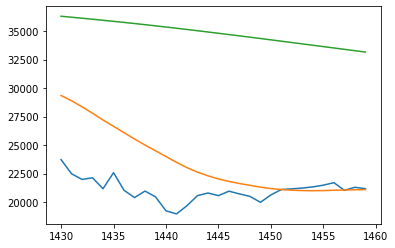

In [ ]:
test_df["close"][-30:].plot()
test_df["short DEMA"][-30:].plot()
test_df["long DEMA"][-30:].plot()

In [ ]:
## ALL in
money = 1000
storage = 0


for i in range(2, len(test_df)):
    if (test_df["short DEMA"][i - 2] < test_df["long DEMA"][i - 2] and test_df["short DEMA"][i - 1] > test_df["long DEMA"][i - 1]):
        if (storage < 0):
            money += storage * test_df["close"][i]
            storage = 0
        storage += money / test_df["close"][i]
        money = 0
    elif (test_df["short DEMA"][i - 2] > test_df["long DEMA"][i - 2] and test_df["short DEMA"][i - 1] < test_df["long DEMA"][i - 1]):
        if (storage > 0):
            money += storage * test_df["close"][i]
            storage = 0
        storage -= money / test_df["close"][i]
        money -= storage * test_df["close"][i]


print(money + storage * test_df["close"][len(test_df) - 1])    



6086.682084932221
